In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr
import yfinance as yfin

In [16]:
start = '2010-01-01'
end = '2019-12-31'
yfin.pdr_override()

df = pdr.get_data_yahoo('AAPL', start = start, end = end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434671,447610800


In [17]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355125,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421051,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798393,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.771538,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.191582,144114400


In [18]:
df = df.reset_index()

In [21]:
df = df.drop(['Date', 'Adj Close' ], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


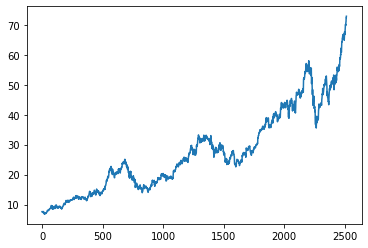

In [22]:
plt.plot(df.Close)

In [23]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

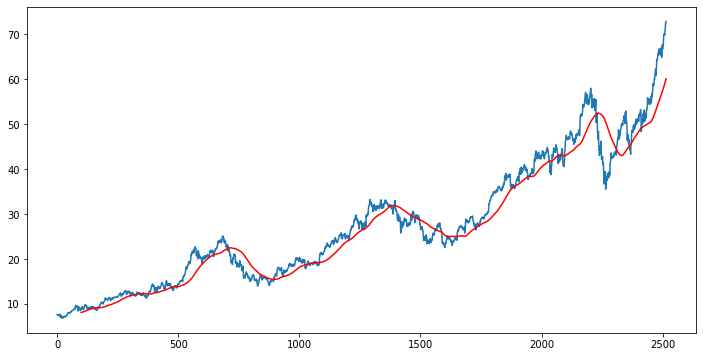

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')

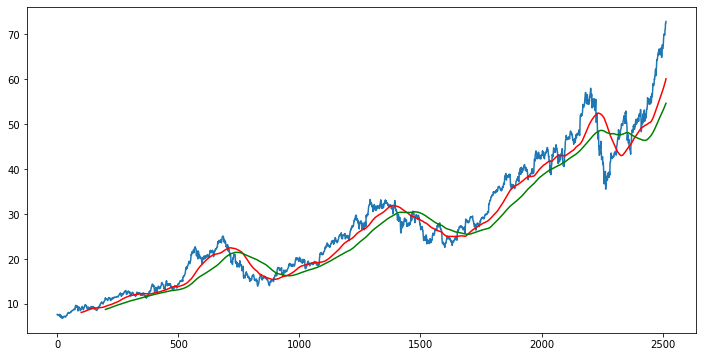

In [26]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [27]:
df.shape

(2515, 5)

In [28]:
#splitting data into train test
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70) : int(len(df))])

print(data_training.shape, data_testing.shape)

(1760, 1) (755, 1)


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))

In [36]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [41]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train) , np.array(y_train)

In [42]:
#ml model
from keras.layers import Dense, Dropout, LSTM 
from keras.models import Sequential 

In [44]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
                input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [46]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 18s 241ms/step - loss: 0.0569
Epoch 2/50
52/52 [==============================] - 14s 261ms/step - loss: 0.0125
Epoch 3/50
52/52 [==============================] - 13s 243ms/step - loss: 0.0097
Epoch 4/50
52/52 [==============================] - 12s 237ms/step - loss: 0.0095
Epoch 5/50
52/52 [==============================] - 12s 229ms/step - loss: 0.0098
Epoch 6/50
52/52 [==============================] - 12s 234ms/step - loss: 0.0089
Epoch 7/50
52/52 [==============================] - 14s 279ms/step - loss: 0.0076
Epoch 8/50
52/52 [==============================] - 12s 238ms/step - loss: 0.0077
Epoch 9/50
52/52 [==============================] - 12s 231ms/step - loss: 0.0071
Epoch 10/50
52/52 [==============================] - 12s 231ms/step - loss: 0.0070
Epoch 11/50
52/52 [==============================] - 14s 269ms/step - loss: 0.0074
Epoch 12/50
52/52 [==============================] - 12s 236ms/step - loss: 0.0062
Epoch 13/50
5

In [47]:
model.save("keras_model.h5")

In [48]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [49]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index = True)
final_df.head()

C:\Users\sarth\AppData\Local\Temp/ipykernel_16444/146272867.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [50]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(855, 1)

In [52]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0 ])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [53]:
#making predictions 

y_predicted = model.predict(x_test)


24/24 [==============================] - 3s 77ms/step


In [54]:
y_predicted.shape
y_test.shape

(755,)

In [55]:
scaler.scale_

array([0.02123255])

In [56]:
scale_factor = 1/ 0.2123255

y_predicted = y_predicted * scale_factor 
y_test  =  y_test * scale_factor

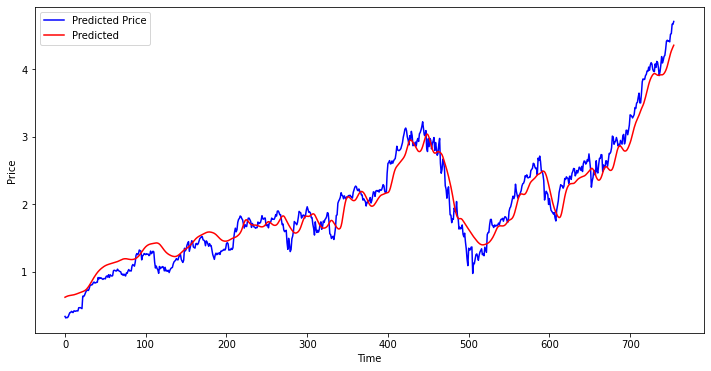

In [57]:
plt.figure(figsize= (12,6))
plt.plot(y_test , 'b', label = 'Predicted Price')
plt.plot(y_predicted, 'r', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()